# Workflow for Class Cell_Data

by Pu Zheng

2018.10.11

Pu Zheng: updated this example to match version for 2018.12.20

# Imports

In [76]:
#%run "E:\Users\puzheng\Documents\Startup_py3.py"
#sys.path.append(r"E:\Users\puzheng\Documents")
%run "C:\Users\Pu Zheng\Documents\Startup_py3.py"
sys.path.append(r"C:\Users\Pu Zheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import get_img_info, visual_tools, corrections, classes, alignment_tools, spot_tools
print(os.getpid())

20000


In [77]:
reload(ia.get_img_info)
reload(ia.spot_tools)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)
reload(ia.alignment_tools)

<module 'ImageAnalysis3.alignment_tools' from 'C:\\Users\\Pu Zheng\\Documents\\ImageAnalysis3\\alignment_tools.py'>

# Create Cell_Data object

## create cell_data class and load basic info

In [78]:
fov_id = 1
cell_id = 0

# specify initialization parameters:
param = {'data_folder':r'Y:\20190616_IMR90_CTP05_intronRNA',
         'fov_id': fov_id,
         'cell_id': cell_id,
         'save_folder':r'G:\IMR90_wt_RNA',
         'experiment_type': 'RNA',
         'num_threads': 12,
         'correction_folder':r'D:\Corrections',
         };

# initialize cell_data class:
rna = ia.classes.Cell_Data(param)

# change some default settings
# change some global settings
rna.shared_parameters['num_empty_frames'] = 0
rna.shared_parameters['corr_Z_shift'] = False

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 33
- Number of field of views: 70
- Importing csv file: Y:\20190616_IMR90_CTP05_intronRNA\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
-- 33 folders are found according to color-usage annotation.


## Load more info for cell

In [79]:
# load existing cell_info, dont run for the first time
rna._load_from_file('cell_info')
# load segmentation/
rna._load_segmentation(_force=False);
# load drift info
drift = rna._load_drift(_size=360, _coord_sel=[500,500], 
                        _dynamic=True, _num_threads=20, 
                        _sequential_mode=False,_force=False)

-- loading cell_info for fov:1, cell:0
- drift already exists for cell:0, skip


### test drift

In [ ]:
%matplotlib notebook
# check drift
crop = np.array([[0,30],[500,800],[500,900]])
data_folder = rna.data_folder[0]
test_ims = [corrections.correct_single_image(os.path.join(data_folder, _hyb_name), 488, num_empty_frames=0,
                                             correction_folder=rna.correction_folder,
                                             crop_limits=crop, drift=_dft, verbose=True)
                                              for _hyb_name, _dft in list(rna.drift.items())[0:4]]
%matplotlib notebook
#lst.cells[2]._load_from_file('unique')
#visual_tools.imshow_mark_3d_v2(lst.cells[2].unique_ims)
visual_tools.imshow_mark_3d_v2(test_ims, image_names=list(rna.drift)[0:4])

# Load and crop images from raw data

In [15]:
rnaunique_ims, rnaunique_ids, rnaunique_channels = rna._crop_images('rna-unique', 
                                                           _load_in_ram=True, 
                                                           _overwrite=True)

- Start cropping unique image
-- loading unique_rounds.npz, time:1.0935869216918945
- all channels in hyb:H0R0\Conv_zscan_69.dax don't have new unique regions, skip!
-- overwrite regions:369, 41 remains
-- overwrite regions:370, 40 remains
-- overwrite regions:368, 39 remains
-- overwrite regions:372, 38 remains
-- overwrite regions:373, 37 remains
-- overwrite regions:371, 36 remains
-- overwrite regions:376, 35 remains
-- overwrite regions:374, 34 remains
-- overwrite regions:375, 33 remains
-- overwrite regions:379, 32 remains
-- overwrite regions:377, 31 remains
-- overwrite regions:378, 30 remains
-- overwrite regions:382, 29 remains
-- overwrite regions:380, 28 remains
-- overwrite regions:381, 27 remains
-- overwrite regions:385, 26 remains
-- overwrite regions:383, 25 remains
-- overwrite regions:384, 24 remains
-- overwrite regions:388, 23 remains
-- overwrite regions:386, 22 remains
-- overwrite regions:387, 21 remains
-- overwrite regions:389, 20 remains
-- overwrite regions

## Save to file 

In [16]:
#rna._save_to_file('all') # save all

rna._save_to_file('cell_info') # save all cell_info exclude images
#rna._save_to_file('cell_info', _save_dic={'distance_zxy':a.distance_zxy}) # save specifically this variable

#rna._save_to_file('unique') # save unique info into unique_rounds.npz

#rna._save_to_file('combo') # save combo_groups into Harry's format

- saving cell_info to file:D:\Pu_Temp\IMR90_wt_DNA\fov-69\cell-0\cell_info.pkl
-- loading existing info from file: D:\Pu_Temp\IMR90_wt_DNA\fov-69\cell-0\cell_info.pkl
- Writing cell data to file: D:\Pu_Temp\IMR90_wt_DNA\fov-69\cell-0\cell_info.pkl


# Generate and Pick chromosome

## generate and identify chromosome

In [5]:
%matplotlib notebook

<IPython.core.display.Javascript object>


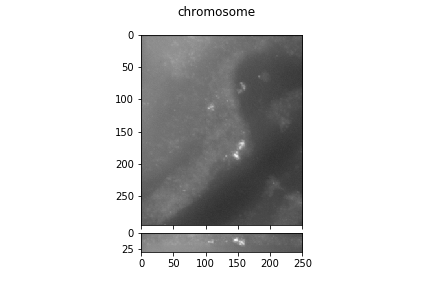

In [58]:
%matplotlib notebook
# generate
rna._generate_chromosome_image('rna-unique', _max_count=90, _verbose=True)
# identify
rna._identify_chromosomes();
# manually pick for only this cell
rna._pick_chromosome_manual()
# then do manual picking and close the matplotlib notebook inferface.

## Update chromosome coordinate info

In [59]:
rna._update_chromosome_from_file();

-- 0 loaded
- saving cell_info to file:G:\IMR90_wt_RNA\fov-31\cell-0\cell_info.pkl
-- loading existing info from file: G:\IMR90_wt_RNA\fov-31\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: G:\IMR90_wt_RNA\fov-31\cell-0\cell_info.pkl


# Fitting and picking spots for unique images

## Load unique images

In [81]:
# unique
rna._load_from_file('rna-unique', _overwrite=False)

- Loading unique from file: G:\IMR90_wt_RNA\fov-1\cell-0\rna-unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93]


## multi-fitting

In [61]:
cand_spots = rna._multi_fitting_for_chromosome(_data_type='rna-unique', _num_threads=12, 
                                               _overwrite=True, _save=True)

- Start multi-fitting for rna-unique images
++ start fitting rna-unique for fov:31, cell:0 with 12 threads
++ total time in fitting rna-unique: 4.617500305175781
- saving cell_info to file:G:\IMR90_wt_RNA\fov-31\cell-0\cell_info.pkl
-- loading existing info from file: G:\IMR90_wt_RNA\fov-31\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['rna-unique_spots', 'rna-unique_ids']
- Writing cell data to file: G:\IMR90_wt_RNA\fov-31\cell-0\cell_info.pkl


## EM pick spots

- Start EM picking rna-unique spots, fov:1, cell:0.
- EM picking spots for 93 regions, use chrom_coords:True
-- filtering spots by intensity threshold=1.2.
-- initialize EM by naively picking spots!
--- EM iter:0, time: 0.085, change_ratio=0.7634408602150538
--- EM iter:1, time: 0.082, change_ratio=0.0


C:\Users\Pu Zheng\Documents\ImageAnalysis3\spot_tools\scoring.py:27: RuntimeWarning: invalid value encountered in greater
  _scores[_dist>max(distance_limits)] -= \
C:\Users\Pu Zheng\Documents\ImageAnalysis3\spot_tools\scoring.py:28: RuntimeWarning: invalid value encountered in greater
  _w * (_dist[_dist>max(distance_limits)]-max(distance_limits)) / _ref_dist
C:\Users\Pu Zheng\Documents\ImageAnalysis3\spot_tools\checking.py:143: RuntimeWarning: invalid value encountered in greater
  _condition += _ct_dists > hard_dist_th


-- check spot for 93 spots
--- use all spots as reference, current thresholds: [ -9.942  -7.461 -15.   ]
--- applying stringency check for 93 spots, threshold=-9.941745892541844
--- 60 spots didn't pass stringent quality check.
-- check spot for 93 spots
--- use all spots as reference, current thresholds: [ -8.941  -7.461 -15.   ]
--- applying stringency check for 93 spots, threshold=-8.940544825088516
--- 61 spots didn't pass stringent quality check.
- saving cell_info to file:G:\IMR90_wt_RNA\fov-1\cell-0\cell_info.pkl
-- loading existing info from file: G:\IMR90_wt_RNA\fov-1\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['EM_picked_rna-unique_spots']
- Writing cell data to file: G:\IMR90_wt_RNA\fov-1\cell-0\cell_info.pkl
-- generate rna-unique dist-map for fov:1, cell:0, chrom:0
-- generate rna-unique dist-map for fov:1, cell:0, chrom:1
-- saving distance_map to file: G:\IMR90_wt_RNA\fov-1\cell-0\distance_maps.npz
--- updated attributes: ['EM_rna-unique_distance_map']

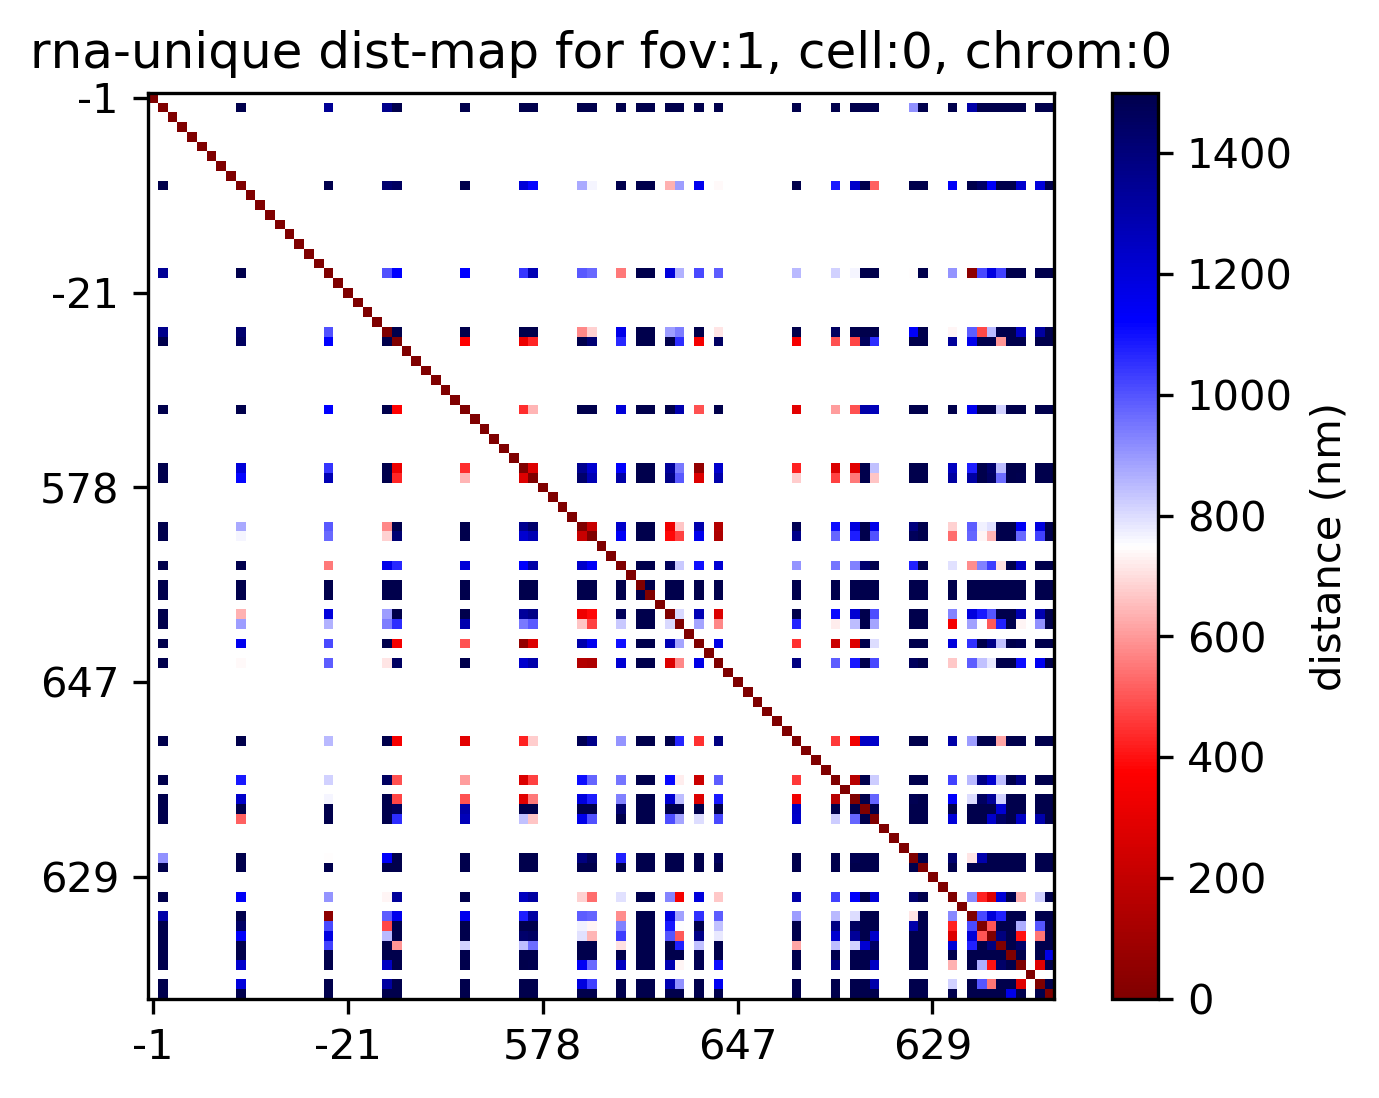

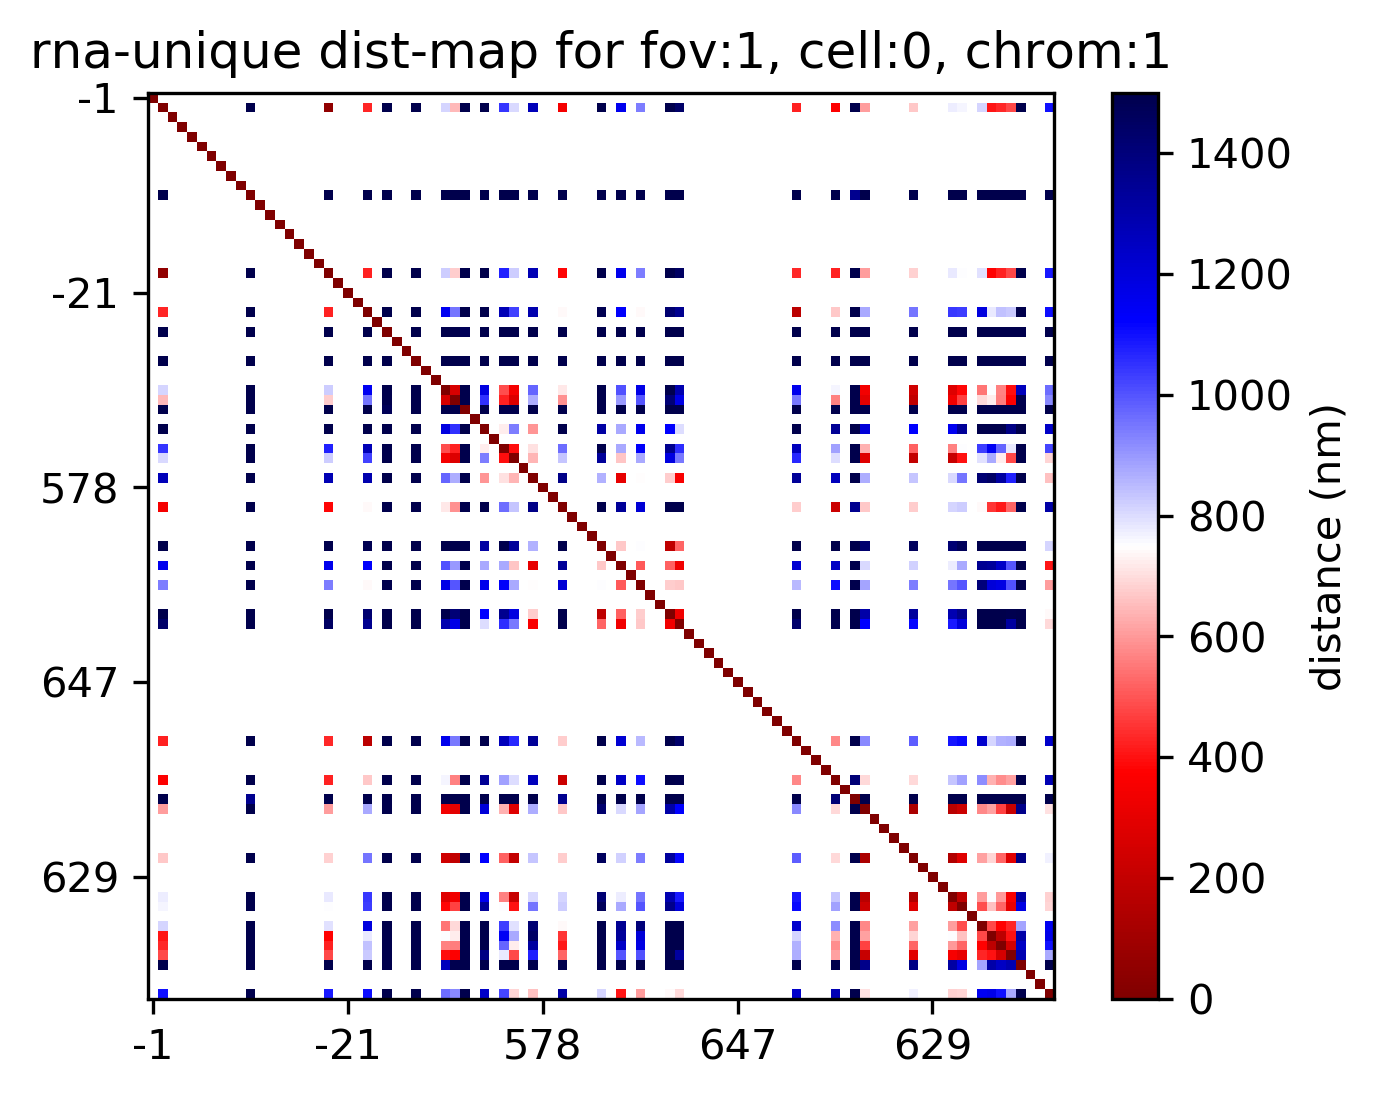

In [114]:
%matplotlib inline
overwrite_distmap=True
EM_picked_spots = rna._pick_spots('rna-unique', 'EM', 
                                      _intensity_th=1.2, _hard_intensity_th=True, _terminate_th=0.03, 
                                      _local_size=5, _w_ctdist=3, _w_lcdist=0.5, _w_int=4, _w_nbdist=0.5,
                                      _distance_limits=[200,5000], _hard_dist_th=4000,
                                      _check_th=-2., _check_percentile=5,
                                      _save_inter_plot=False, _save_to_info=True, _overwrite=overwrite_distmap)
distmaps = rna._generate_distance_map('rna-unique','EM',_limits=[0,1500], _overwrite=overwrite_distmap, 
                                      _save_info=True, _save_plot=False)

--- dump coordinate information into .\fitted_image.pkl


<IPython.core.display.Javascript object>


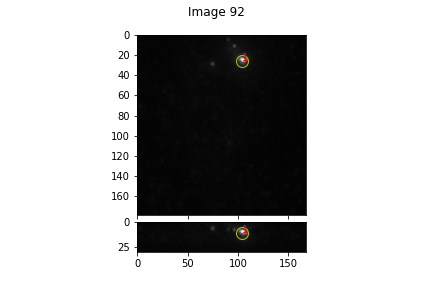

In [117]:
%matplotlib notebook
ims = getattr(rna, 'rna-unique_ims')
ids = getattr(rna, 'rna-unique_ids')
sel_spots = getattr(rna, 'EM_picked_rna-unique_spots')

visual_tools.visualize_fitted_spot_images(ims, sel_spots[1][:,1:4], np.array(ids)-1)